## Number of OS, Cpfl1 dataset, plot over time

Here the number of OS are plotted over time for the Cpfl1 dataset alone. Additionally, some functions were written to automatically annotate significant results from a posthoc Tukey test.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sys
sys.path.append("../../")
from quapos_lm import significant_tukey_results, x_coordinate, asterics

In [2]:
# Define path were measurements are stored
measurements_path = "../../measurements/cpfl/"

# Define path were plots should be stored
save_path = "../../plots-images/quapos-paper/figure-3-plots/"

In [3]:
# Load measurements
measurements = pd.read_csv(measurements_path + "08-features-processed.csv")
measurements

,image_id,age,maximum,mean,median,minimum,sigma,sum,variance,flatness,...,perimeter_2d_rescaled,major_axis_length_2d_rescaled,minor_axis_length_2d_rescaled,surface_area_rescaled,bbox_volume_rescaled,convex_volume_rescaled,volume_rescaled,label,genotype,summed_volume
0,0,8,435.323232,231.815654,215.544626,136.808081,67.478992,50966.181818,8476.601950,1.525459,...,6.422570,2.481628,1.372441,19.037570,17.155822,8.109028,5.670840,99,cpfl,563.030645
1,1,8,460.709677,224.380055,206.129242,126.634409,70.985109,56809.064516,8270.087836,1.629387,...,7.325543,2.841319,1.473626,24.355526,21.933224,10.160933,6.959598,93,cpfl,648.556847
2,2,8,510.370968,252.925858,232.679688,141.645161,81.942129,46226.919355,12177.344482,1.478168,...,5.670415,2.152691,1.295106,16.577307,13.719543,6.730957,4.823200,62,cpfl,300.083068
3,3,14,608.186207,293.062064,266.616379,157.948276,99.985899,94890.186207,16773.811155,1.415236,...,8.747193,3.531725,1.585332,27.055333,25.996121,12.821610,8.657550,290,cpfl,3659.193719
4,4,14,648.180556,298.264152,268.251157,154.018519,107.243126,104264.393519,18925.976599,1.424420,...,9.041931,3.524640,1.744031,27.524135,29.736536,13.434220,9.092604,216,cpfl,3710.954257
5,5,14,546.748148,272.073887,250.414280,153.170370,86.006519,84179.600000,11148.498631,1.464712,...,8.949500,3.568040,1.559667,27.394193,29.199424,13.371972,8.435550,135,cpfl,2371.852523
6,6,20,487.565517,243.963166,224.548761,130.993103,77.417826,106942.248276,9129.420382,1.488183,...,10.161918,3.974969,1.837445,36.029479,39.587794,18.379267,11.898974,145,cpfl,2115.038030
7,7,20,442.237805,228.048594,211.738281,126.243902,69.436005,77319.286585,6960.528745,1.612874,...,8.767230,3.694451,1.541159,28.744134,31.292334,13.436362,9.488528,164,cpfl,1804.643293
8,8,20,359.148387,191.621903,179.647253,108.348387,52.769600,78788.929032,4414.103336,1.477569,...,9.842299,3.811786,1.790636,33.458424,35.488406,17.097196,10.850190,155,cpfl,2869.171547
9,9,245,865.575758,368.635598,323.865057,173.484848,155.070912,157599.121212,41263.537517,1.235098,...,9.257627,3.302101,1.937421,27.561774,26.845265,14.834386,10.540409,33,cpfl,953.964241


### Filter Cpfl1 dataset

Cpfl1 dataset represented in the plot independent from the WT control animals, to investigate whether there are internally differences between the different timepoints.

In [4]:
# Retrieve Cpfl1 dataset
measurements_cpfl = measurements[measurements["genotype"] == "cpfl"]
measurements_cpfl

,image_id,age,maximum,mean,median,minimum,sigma,sum,variance,flatness,...,perimeter_2d_rescaled,major_axis_length_2d_rescaled,minor_axis_length_2d_rescaled,surface_area_rescaled,bbox_volume_rescaled,convex_volume_rescaled,volume_rescaled,label,genotype,summed_volume
0,0,8,435.323232,231.815654,215.544626,136.808081,67.478992,50966.181818,8476.601950,1.525459,...,6.422570,2.481628,1.372441,19.037570,17.155822,8.109028,5.670840,99,cpfl,563.030645
1,1,8,460.709677,224.380055,206.129242,126.634409,70.985109,56809.064516,8270.087836,1.629387,...,7.325543,2.841319,1.473626,24.355526,21.933224,10.160933,6.959598,93,cpfl,648.556847
2,2,8,510.370968,252.925858,232.679688,141.645161,81.942129,46226.919355,12177.344482,1.478168,...,5.670415,2.152691,1.295106,16.577307,13.719543,6.730957,4.823200,62,cpfl,300.083068
3,3,14,608.186207,293.062064,266.616379,157.948276,99.985899,94890.186207,16773.811155,1.415236,...,8.747193,3.531725,1.585332,27.055333,25.996121,12.821610,8.657550,290,cpfl,3659.193719
4,4,14,648.180556,298.264152,268.251157,154.018519,107.243126,104264.393519,18925.976599,1.424420,...,9.041931,3.524640,1.744031,27.524135,29.736536,13.434220,9.092604,216,cpfl,3710.954257
5,5,14,546.748148,272.073887,250.414280,153.170370,86.006519,84179.600000,11148.498631,1.464712,...,8.949500,3.568040,1.559667,27.394193,29.199424,13.371972,8.435550,135,cpfl,2371.852523
6,6,20,487.565517,243.963166,224.548761,130.993103,77.417826,106942.248276,9129.420382,1.488183,...,10.161918,3.974969,1.837445,36.029479,39.587794,18.379267,11.898974,145,cpfl,2115.038030
7,7,20,442.237805,228.048594,211.738281,126.243902,69.436005,77319.286585,6960.528745,1.612874,...,8.767230,3.694451,1.541159,28.744134,31.292334,13.436362,9.488528,164,cpfl,1804.643293
8,8,20,359.148387,191.621903,179.647253,108.348387,52.769600,78788.929032,4414.103336,1.477569,...,9.842299,3.811786,1.790636,33.458424,35.488406,17.097196,10.850190,155,cpfl,2869.171547
9,9,245,865.575758,368.635598,323.865057,173.484848,155.070912,157599.121212,41263.537517,1.235098,...,9.257627,3.302101,1.937421,27.561774,26.845265,14.834386,10.540409,33,cpfl,953.964241


### Compute significant Tukey results

A function will be applied which computes Tukey results and filters groups which are statistically significant. The function is based on the `pairwise_tukeyhsd` function from the `statsmodels.stats.multicomp` package.

In [5]:
# Compute significant tukey results
significance = significant_tukey_results(dataframe=measurements_cpfl, x="age", y="label")
significance

,group1,group2,meandiff,p-adj,lower,upper,reject
0,8,14,129.0000,0.0063,33.7069,224.2931,True
7,14,70,-162.0000,0.0009,-257.2931,-66.7069,True
10,20,70,-103.0000,0.0313,-198.2931,-7.7069,True
8,14,245,-196.6667,0.0001,-285.8052,-107.5281,True
11,20,245,-137.6667,0.0021,-226.8052,-48.5281,True
13,30,245,-105.0000,0.0177,-194.1385,-15.8615,True


### Calculate the mean number of labels per age

Since I do not like the line markerstyle from `seaborn`. The mean values will be calculated with `.groupby("age")` and manually added to the plot using `plt.hlines()`.

In [6]:
# Compute means
means = measurements_cpfl.groupby("age", as_index=False)["label"].mean()
means

,age,label
0,8,84.666667
1,14,213.666667
2,20,154.666667
3,30,122.000000
4,70,51.666667
5,245,17.000000


### Compute plot representing the means of each age

Now a plot is drawn which shows:

- mean number of labels per age
- the standard error of the mean per age
- the single datapoints which were used to determine the average/sem
- statistical significance

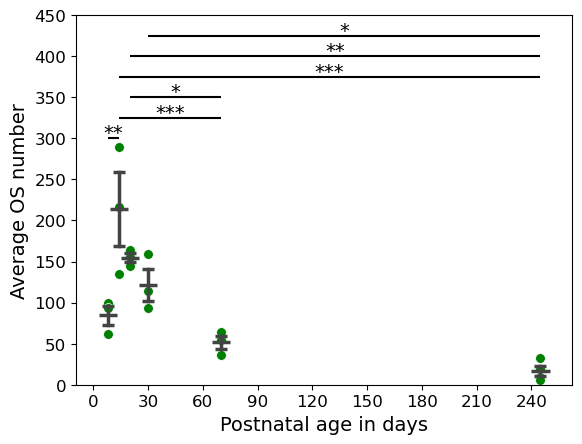

In [7]:
# Draw a line plot without line
lineplot = sns.lineplot(data=measurements_cpfl,
                        x="age",
                        y="label",
                        linestyle="",
                        errorbar="se",
                        err_style = "bars",
                        color="#434343",
                        err_kws={"capsize": 4, "linewidth": 2.5, "capthick": 2.5})

# Draw a scatterplot
sns.scatterplot(data=measurements_cpfl,
                x="age",
                y="label",
                color="g",
                s=50)

# Add the mean values to the plot
for index, row in means.iterrows():
    
    # Add the mean values
    plt.hlines(y=row["label"], xmin=row["age"]-5, xmax=row["age"]+5, linewidth=2.5, color="#434343", linestyle="-")

# Adjust Y axis
plt.ylim(0, 450)
plt.ylabel("Average OS number", fontsize=14)
plt.yticks(fontsize=12)

# Adjust X axis
ticks = [0, 30, 60, 90, 120, 150, 180, 210, 240]
plt.xlabel("Postnatal age in days", fontsize=14)
plt.xticks(ticks = ticks, labels = ticks, fontsize=12)

# Adjust title
#plt.title("OS number", loc="left", fontsize=20)

# Define y position for significance annotation, and distance between significant lines
y_position = 300
distance = 25

# Draw the annotation into the plot
for index, row in significance.iterrows():
    
    # Store significant pairs in respective variables
    group_1, group_2 = row["group1"], row["group2"]
    
    # Determine significance stars for annotation
    asteric_values = asterics(row=row, column_name="p-adj")
    
    # Determine x_position of the asteric
    x_position = x_coordinate(xmin=group_1, xmax=group_2)
    
    # Draw the line as well as the asteric
    lineplot.text(x_position, y_position, asteric_values, fontsize=14, ha="center")
    lineplot.hlines(y=y_position, xmax=group_1, xmin=group_2, color="k")
    
    # Update y_position
    y_position = y_position + distance
    
plt.savefig(save_path + "01-b-os-number-cpfl-alone.png",
            dpi=300,
            bbox_inches="tight",
            transparent=False)